<a href="https://colab.research.google.com/github/AlexandreMorinvil/MNIST-digit-recognizer/blob/main/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This solution is inpired by the following resources :
# - https://www.kaggle.com/code/amirhoseinsedaghati/digit-classification-using-cnn-0-9974-score
# - https://www.kaggle.com/code/skv1436/mnist-cnn-accuracy-0-99

## Initializing the environment

### Imports

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math

### Importing the data

In [3]:
!pip install kaggle

In [4]:
# A Kaggle API key is store in the Google Drive folder called 'kaggle', located
# at the root of the Drive.

# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

!rm -r ~/.kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c digit-recognizer

! mkdir data
! unzip digit-recognizer.zip -d data

# Unmount your Google Drive
drive.flush_and_unmount()

Mounted at /content/drive
rm: cannot remove '/root/.kaggle': No such file or directory
 46% 7.00M/15.3M [00:00<00:00, 72.2MB/s]
100% 15.3M/15.3M [00:00<00:00, 111MB/s] 
Archive:  digit-recognizer.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [5]:
! ls kaggle_data

ls: cannot access 'kaggle_data': No such file or directory


## EDA

In [6]:
train_df = pd.read_csv('data/train.csv')
target_df = pd.read_csv('data/test.csv')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [9]:
train_df.shape

(42000, 785)

In [10]:
train_image, train_label = train_df.iloc[:, 1:].values, train_df['label'].values

In [11]:
train_image = train_image.reshape((-1, 28, 28))
target_image = target_df.values.reshape((-1, 28, 28))

In [12]:
print(f'Shape of the training images: {train_image.shape}\nShape of the target images: {target_image.shape}')

Shape of the training images: (42000, 28, 28)
Shape of the target images: (28000, 28, 28)


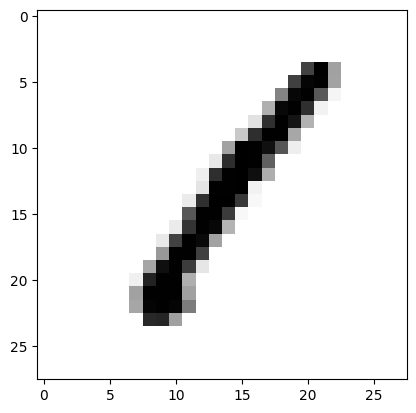

In [13]:
plt.imshow(train_image[0].reshape(28, 28), cmap=plt.cm.gray_r)

In [14]:
def display_images(images, labels=None, start=0, images_count=5):

    rows_count = math.ceil(images_count / 10)
    columns_count = min(10, images_count)
    counter = 0

    fig = plt.figure(figsize=(10, rows_count + 1))
    for i in range(images_count):
        index = start + i
        plt.subplot(rows_count, columns_count, i + 1)
        plt.imshow(images[index], cmap=plt.cm.gray_r);
        plt.axis('off');
        plt.title(f'{labels[index]}');

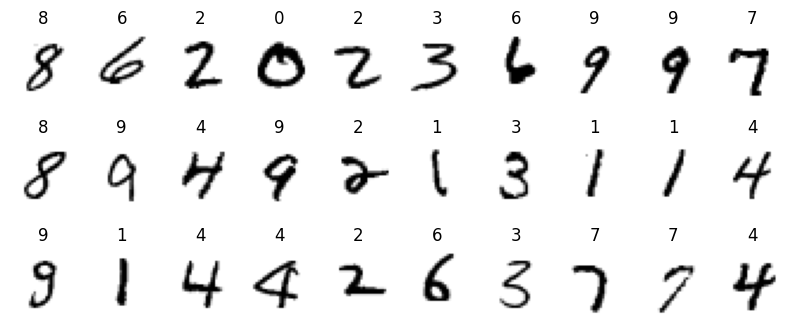

In [15]:
display_images(train_image, train_label, start=20, images_count=30)

[Text(0.5, 1.0, 'Number of images in each class')]

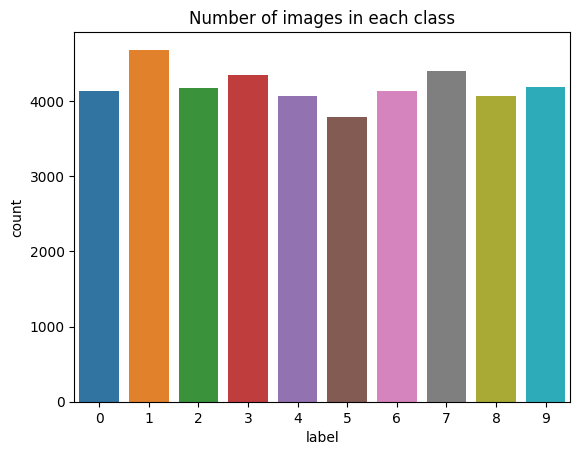

In [16]:
sns.countplot(x='label', data=train_df).set(title='Number of images in each class')

## Preprocessing

### Scaling
Scaling the pixels will make all the pixels have the same magnitude, which will help the neural network to associate proper weights to every relevant pixel.

In [17]:
preprocessed_train_image = train_image / 255.0

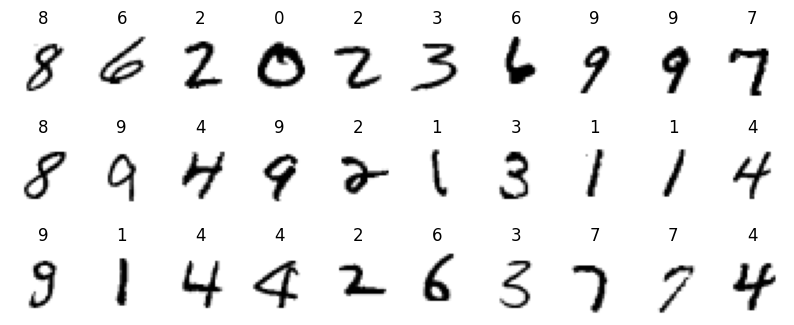

In [18]:
display_images(preprocessed_train_image, train_label, start=20, images_count=30)

## Data Modeling

In [33]:
import tensorflow as tf
from tensorflow.keras.models import save_model, load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split

In [34]:
print("TensorFlow version:", tf.__version__)
print("Is Tensorflow built with CUDA:", tf.test.is_built_with_cuda())

TensorFlow version: 2.12.0
Is Tensorflow built with CUDA: True


In [51]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation="relu", name="layer1"))
    model.add(Dense(10))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

model = create_model()

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


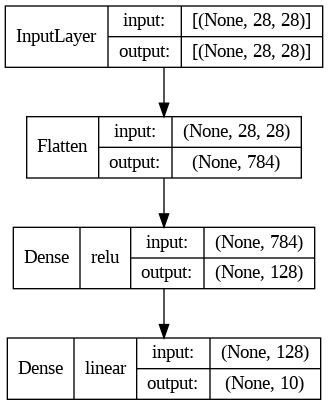

In [53]:
plot_model(model, show_layer_activations=True, show_shapes=True, show_layer_names=False)

In [54]:
history = model.fit(x=train_image,
                    y=train_label,
                    epochs=6,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/6
1050/1050 [==============================] - 9s 8ms/step - loss: 10.8404 - sparse_categorical_accuracy: 0.1465 - val_loss: 12.1387 - val_sparse_categorical_accuracy: 0.1938
Epoch 2/6
1050/1050 [==============================] - 5s 5ms/step - loss: 12.7387 - sparse_categorical_accuracy: 0.1623 - val_loss: 12.5648 - val_sparse_categorical_accuracy: 0.1648
Epoch 3/6
1050/1050 [==============================] - 6s 6ms/step - loss: 8.3235 - sparse_categorical_accuracy: 0.2336 - val_loss: 2.7959 - val_sparse_categorical_accuracy: 0.2721
Epoch 4/6
1050/1050 [==============================] - 7s 7ms/step - loss: 2.4039 - sparse_categorical_accuracy: 0.2602 - val_loss: 2.2241 - val_sparse_categorical_accuracy: 0.2545
Epoch 5/6
1050/1050 [==============================] - 5s 5ms/step - loss: 2.3153 - sparse_categorical_accuracy: 0.1874 - val_loss: 2.3309 - val_sparse_categorical_accuracy: 0.1498
Epoch 6/6
1050/1050 [==============================] - 6s 6ms/step - loss: 2.3377 - sparse_

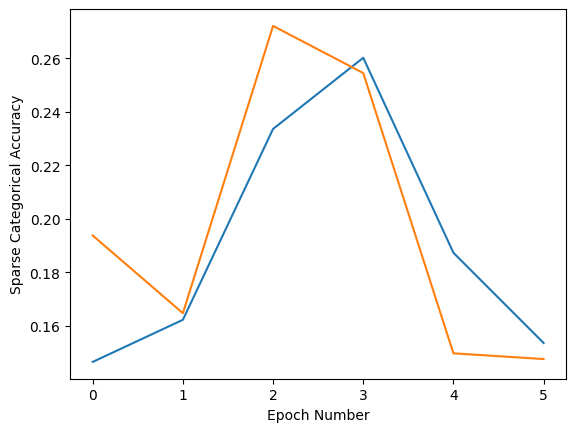

In [55]:
plt.xlabel('Epoch Number')
plt.ylabel("Sparse Categorical Accuracy")
plt.plot(history.history['sparse_categorical_accuracy'], label='Training')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation')

## Prediction

In [40]:
# Training the model on all the data
model = create_model()
history = model.fit(x=train_image,
                    y=train_label,
                    epochs=6,
                    verbose=1)

Epoch 1/6
1313/1313 [==============================] - 6s 4ms/step - loss: 2.7903 - sparse_categorical_accuracy: 0.0758
Epoch 2/6
1313/1313 [==============================] - 8s 6ms/step - loss: 2.3032 - sparse_categorical_accuracy: 0.0760
Epoch 3/6
1313/1313 [==============================] - 7s 6ms/step - loss: 2.3032 - sparse_categorical_accuracy: 0.0760
Epoch 4/6
1313/1313 [==============================] - 6s 5ms/step - loss: 2.3032 - sparse_categorical_accuracy: 0.0760
Epoch 5/6
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3032 - sparse_categorical_accuracy: 0.0760
Epoch 6/6
1313/1313 [==============================] - 6s 5ms/step - loss: 2.3032 - sparse_categorical_accuracy: 0.0760


In [41]:
predictions = np.argmax(model.predict(target_image), axis=1)

875/875 [==============================] - 2s 2ms/step


<Axes: >

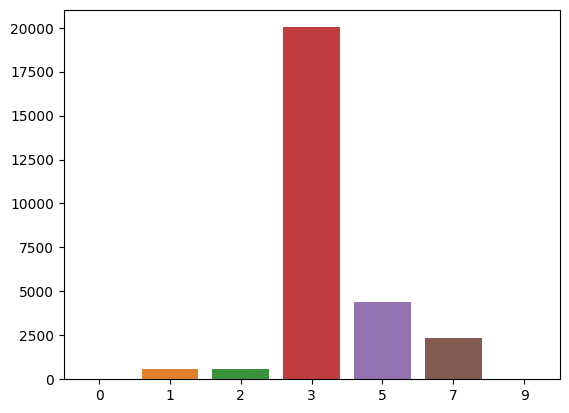

In [42]:
label, count = np.unique(predictions, return_counts=True)
sns.barplot(x=label, y=count)

In [43]:
#submission_df = pd.DataFrame(data={
#    'ImageId': list(range(1, len(y_target) + 1)),
#    'Label': y_target,
#})

In [44]:
#submission_df.to_csv('submission.csv', index=False)

In [45]:
# submit the file to kaggle
#! kaggle competitions submit digit-recognizer -f submission.csv -m "First submission using a barebone Neural network with one Dense layer and barely any optimization"